In [1]:
import sparsedm
import numpy as np
import matplotlib.pyplot as plt
import circuit
%matplotlib inline

In [2]:
qubit_names = ["D1", "A1", "D2", "A2", "D3"]

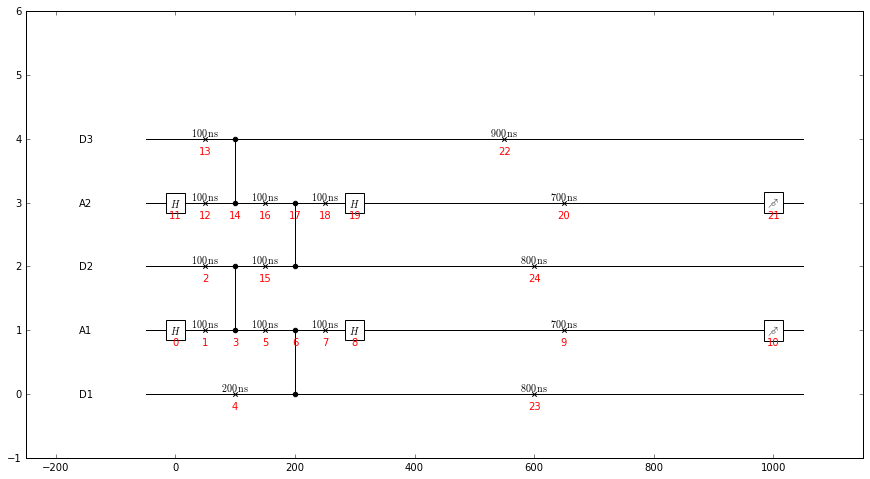

In [60]:
c = circuit.Circuit()

for qb in qubit_names:
    c.add_qubit(circuit.Qubit(qb, 30000, 50000))

c.add_gate(circuit.Hadamard("A1", time=0))
c.add_gate(circuit.Hadamard("A2", time=0))

c.add_gate(circuit.CPhase("A1", "D1", time=200))
c.add_gate(circuit.CPhase("A2", "D2", time=200))

c.add_gate(circuit.CPhase("A1", "D2", time=100))
c.add_gate(circuit.CPhase("A2", "D3", time=100))

c.add_gate(circuit.Hadamard("A1", time=300))
c.add_gate(circuit.Hadamard("A2", time=300))



m1 = circuit.Measurement("A1", time=1000, sampler=None)
c.add_gate(m1)
m2 = circuit.Measurement("A2", time=1000, sampler=None)
c.add_gate(m2)

c.add_waiting_gates()

plt.figure(figsize=(15,8))

c.order()
c.plot()


In [44]:
sdm = sparsedm.SparseDM(qubit_names)

for bit in sdm.classical:
    sdm.classical[bit] = 1

sdm.classical["D3"] = 0

print(sdm.classical)

{'D1': 1, 'D3': 0, 'A1': 1, 'D2': 1, 'A2': 1}


In [54]:
c.apply_to(sdm)

In [55]:
sdm.classical

{'A1': 1, 'A2': 1}

In [56]:
sdm.trace()

array(0.016274436437464325)

In [57]:
m1.measurements

[1, 1, 1, 1, 1, 1, 0, 1]

In [58]:
m2.measurements

[0, 1, 0, 1, 0, 1, 0, 1]